## Парсинг (скрепинг)

## Классический парсинг

### Парсинг

Парсинг – извлечение неструктурированных данных из интернета.

<center>
    <img src="images/download.png" width="550px">
</center>

### На чем пишутся сайты?

**HTML (HyperText Markup Language)**  — это такой же язык разметки как Markdown или LaTeX. Он является стандартным для написания различных сайтов. Если открыть абсолютно любой сайт, нажать на правую кнопку мышки, а после нажать `View page source`, то перед вами предстанет HTML скелет этого сайта. 

Можно открыть html-код стартовой яндекса, найти в нём новость из топа и немного её изменить. Понятное дело, что вы так меняете html-страничку только на своём компьютере (клиенте). На сервере яндекса остаётся исходная версия. Когда вы обновите страничку все правки исчезнут.

<img src="images/yandex_html.png">

### Теги

Команды в HTML называются **тегами**. HTML-страница это ни что иное, как набор вложенных тегов. Можно заметить, например, следующие теги:

* \<title\> – заголовок страницы
* \<h1\>…\<h6\> – заголовки разных уровней
* \<p\> – абзац (paragraph)
* \<div\> – выделения фрагмента документа с целью изменения вида содержимого
* \<table\> – прорисовка таблицы
* \<tr\> – разделитель для строк в таблице
* \<td\> – разделитель для столбцов в таблице
* \<b\> – устанавливает жирное начертание шрифта
    
Обычно команда <...> открывает тег, а </...> закрывает его. Все, что находится между этими двумя командами, подчиняется правилу, которое диктует тег. Например, все, что находится между \<p\> и \</p\> — это отдельный абзац.

### Пример

Например, HTML-древо страницы может выглядеть вот так:

```html
<html>
<head> Заголовок </head>
<body>
    <div>
        Первый кусок текста со своими свойствами
    </div>
    <div>
        Второй кусок текста
            <b>
                Третий, жирный кусок
            </b>
    </div>
    Четвёртый кусок текста
</body>
</html>
```

### html ~ tree

Теги образуют своеобразное дерево с корнем в теге <html> и разбивают страницу на разные логические кусочки. У каждого тега есть свои потомки (дети) — те теги, которые вложены в него и свои родители. 
    
Можно работать с этим html как с текстом, а можно как с деревом. Обход этого дерева и есть парсинг веб-страницы. Мы всего лишь будем находить нужные нам узлы среди всего этого разнообразия и забирать из них информацию!

```
<html>
<head> Заголовок </head>
<body>
    <div>
        Первый кусок текста со своими свойствами
    </div>
    <div>
        Второй кусок текста
            <b>
                Третий, жирный кусок
            </b>
    </div>
    Четвёртый кусок текста
</body>
</html>
```

<center>
<img src="images/tree.png" width="450"> 

### Качаем цены на книги

Давайте соберем информацию с сайта о [книгах](http://books.toscrape.com). Этот сайт специально создан, чтобы тренироваться парсить на нем.

Получать html позволяет модуль `requests`, он не входит в стандартуную библиотеку *python*. Сделав запрос, мы видим код 200. Этот код, означает, что все прошло успешно. Вы наверняка встречали ошибку 404 в своей жизни. Что означает каждая ошибка можно почитать [тут](https://ru.wikipedia.org/wiki/Список_кодов_состояния_HTTP).

In [219]:
# !pip install requests
import requests  

url = 'http://books.toscrape.com/'
response = requests.get(url)
print(response)
print(response.status_code)

<Response [200]>
200


In [220]:
requests.get('http://books.toscrape.com/mts')

<Response [404]>

### Что получили?

Внутри response лежит html страница, которую и надо спарсить. 

In [221]:
response.content[:1000]

b'<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:29" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon" hre

### BeautifulSoup

Выглядит не очень. Мы говорили, что удобнее работать с деревом.

<img align="center" src="images/alisa.jpg" height="200" width="200"> 

Пакет **[`bs4`](https://www.crummy.com/software/BeautifulSoup/)**, a.k.a **BeautifulSoup** был назван в честь стишка про красивый суп из Алисы в стране чудес. Эта совершенно волшебная библиотека, которая из сырого и необработанного HTML (или XML) кода страницы выдаст вам структурированный массив данных, по которому очень удобно искать необходимые теги, классы, атрибуты, тексты и прочие элементы веб страниц.

> Пакет под названием `BeautifulSoup` — скорее всего, не то, что вам нужно. Это третья версия (*Beautiful Soup 3*), а мы будем использовать четвертую. Так что нам нужен пакет `beautifulsoup4`. Чтобы было совсем весело, при импорте нужно указывать другое название пакета — `bs4`, а импортировать функцию под названием `BeautifulSoup`.

In [222]:
# !pip install bs4
from bs4 import BeautifulSoup

# распарсили страничку в дерево 
tree = BeautifulSoup(response.content, 'html.parser')

Внутри переменной `tree` теперь лежит дерево из тегов, по которому мы можем совершенно спокойно бродить. 

In [227]:
tree.head.title.text.strip()

'All products | Books to Scrape - Sandbox'

Можно вытащить из того места, куда мы забрели, текст с помощью метода `text`.

In [133]:
tree.html.head.title.text

'\n    All products | Books to Scrape - Sandbox\n'

С текстом можно работать классическими питоновскими методами. Например, можно избавиться от лишних отступов.

In [7]:
tree.html.head.title.text.strip()

'All products | Books to Scrape - Sandbox'

Более того, зная адрес элемента, мы сразу можем найти его. Например, вот так в коде страницы мы можем найти где именно для каждой книги лежит основная информация. Видно, что она находится внутри тега `article`, для которого прописан класс `product_pod` (грубо говоря, в html класс задаёт оформление соотвествующего кусочка страницы). 

Вытащим инфу о книге из этого тега. 

In [235]:
books = tree.find_all('article', {'class': 'product_pod'})

In [236]:
len(books)

20

Полученный после поиска объект также обладает структурой bs4. Поэтому можно продолжить искать нужные нам объекты уже в нём.

In [238]:
type(books[0])

bs4.element.Tag

In [239]:
books[0]

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [241]:
books[0].find('p', {'class': 'price_color'}).text

'£51.77'

Обратите внимание, что для поиска есть как минимум два метода: `find` и `find_all`. Если несколько элементов на странице обладают указанным адресом, то метод `find` вернёт только самый первый. Чтобы найти все элементы с таким адресом, нужно использовать метод `find_all`. На выход будет выдан список.

Кроме содержимого у тегов часто есть атрибуты. Например, у названия книги есть атрибуты `title` и `href`, их тоже можно вытащить.

In [12]:
books[0].h3.a.get('href')

'a-light-in-the-attic_1000/index.html'

In [13]:
books[0].h3.a.get('title')

'A Light in the Attic'

А ещё по этим атрибутам можно искать интересующие нас кусочки страницы. 

In [14]:
tree.find_all('a', {'title': 'A Light in the Attic'})

[<a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a>]

Собственно говоря, это всё. 

Обратите внимание, что на сайте все книги лежат на разных страничках. Если попробовать потыкать их, можно заметить, что в ссылке будет меняться атрибут `page`. Значит, если мы хотим собрать все книги, надо создать кучу ссылок с разным `page` внутри цикла. Когда качаешь данные с более сложных сайтов, в ссылке часто есть огромное количество атрибутов, которые регулируют выдачу.


Давайте запишем весь код для сбора книг в виде функции. На вход она будет принимать номер странички, которую надо скачать. 

In [249]:
import requests
from bs4 import BeautifulSoup

In [250]:
def get_page(p):
    
    # изготовили ссылку
    url = f'http://books.toscrape.com/catalogue/page-{p}.html'
    
    # сходили по ней
    response = requests.get(url)
    
    # построили дерево 
    tree = BeautifulSoup(response.content, 'html.parser')
    
    # нашли в нём всё самое интересное
    books = tree.find_all('article', {'class' : 'product_pod'})
    
    infa = []
    
    for book in books:        
        infa.append({'price': book.find('p', {'class': 'price_color'}).text,
                     'href': book.h3.a.get('href'),
                     'title': book.h3.a.get('title')})
                     
    return infa

Осталось только пройтись по всем страничкам от page-1 до page-50 циклом и данные у нас в кармане. 

In [3]:
# !pip install tqdm

In [254]:
from time import sleep
from tqdm import tqdm

infa = []

for p in tqdm(range(1, 5 + 1)):
    infa.extend(get_page(p))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:07<00:00,  1.44s/it]


In [62]:
# !pip install pandas

In [257]:
import pandas as pd

df = pd.DataFrame(infa)
print(df.shape)
df.head()

(100, 3)


,price,href,title
0,£51.77,a-light-in-the-attic_1000/index.html,A Light in the Attic
1,£53.74,tipping-the-velvet_999/index.html,Tipping the Velvet
2,£50.10,soumission_998/index.html,Soumission
3,£47.82,sharp-objects_997/index.html,Sharp Objects
4,£54.23,sapiens-a-brief-history-of-humankind_996/index...,Sapiens: A Brief History of Humankind


In [258]:
df['price'] = df['price'].str.replace("£", '').astype(float)

In [75]:
# !pip install matplotlib

<AxesSubplot:>

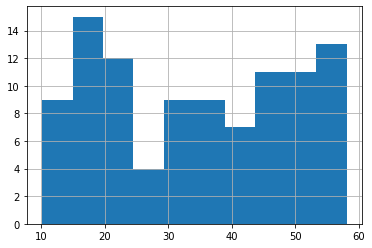

In [259]:
df['price'].hist()

Кстати говоря, если перейти по ссылке в саму книгу, там о ней будет куча дополнительной информации. Можно пройтись по всем ссылкам и выкачать себе по ним дополнительную информацию. 

## Сервер злится

### Что делать, если сервер разозлился

* Вы решили собрать себе немного данных 
* Сервер не в восторге от бомбардировки автоматическими запросами 
* Error 403, 404, 504, $\ldots$ 
* Капча, требования зарегистрироваться
* Заботливые сообщения, что с вашего устройства обнаружен подозрительный трафик

<center>
    <img src="images/doge.jpg" width="450"> 
</center>

### Быть терпеливым 

* Слишком частые запросы раздражают сервер
* Ставьте между ними временные задержки 

In [ ]:
import time
time.sleep(3)

## Быть похожим на человека

Запрос нормального человека через браузер выглядит так: 

<center>
<img src="images/browser_get.png" width="600"> 
    
С ним на сервер попадает куча информации! Запрос от питона выглядит так: 

<center>
<img src="images/python_get.jpg" width="250"> 
 
Заметили разницу?  Очевидно, что нашему скромному запросу не тягаться с таким обилием мета-информации, которое передается при запросе из обычного браузера. К счастью, никто нам не мешает притвориться человечными и пустить пыль в глаза сервера при помощи генерации фейкового юзер-агента. Библиотека [fake-useragent.](https://pypi.org/project/fake-useragent/) при вызове метода из различных кусочков будет генерировать рандомное сочетание операционной системы, спецификаций и версии браузера, которые можно передавать в запрос.

In [266]:
# !pip install fake_useragent
from fake_useragent import UserAgent
UserAgent().chrome

'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'

Например, https://knowyourmeme.com/ не захочет пускать к себе python и выдаст ошибку 403. Она выдается сервером, если он доступен и способен обрабатывать запросы, но по некоторым личным причинам отказывается это делать. А если сгенерировать User-Agent, вопросов у сервера не возникнет. 

In [200]:
url = 'https://knowyourmeme.com/'

response = requests.get(url)
response

<Response [403]>

In [201]:
response = requests.get(url, headers={'User-Agent': UserAgent().chrome})
response

<Response [200]>

### Общаться через посредников

<center>
<img src="images/proxy.jpeg" width="400"> 
    

Посмотрим на свой ip-адрес без прокси. 

In [271]:
r = requests.get('https://httpbin.org/ip')
print(r.json())

{'origin': '180.183.33.82'}


А теперь попробуем посмотреть, что будет если подключить прокси.

In [269]:
proxies = {
    'http': '177.86.201.22:8080',
#     'https': '182.53.206.47:47592'
}

r = requests.get('https://httpbin.org/ip', proxies=proxies)

print(r.json())

{'origin': '180.183.36.19'}


Запрос работал немного подольше, ip адрес сменился. Большая часть проксей, которые вы найдёте работают криво. Иногда запрос идёт очень долго и выгоднее сбросить его и попробовать другую проксю. Это можно настроить опцией `timeout`.  Например, так если сервер не будет отвечать секунду, код упадёт. 

In [ ]:
from requests import ConnectTimeout

In [270]:
import requests
requests.get('http://www.google.com', timeout=0.01)

ConnectTimeout: HTTPConnectionPool(host='www.google.com', port=80): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fd86dc0a520>, 'Connection to www.google.com timed out. (connect timeout=0.01)'))

У requests есть довольно много разных интересных примочек. Посмотреть на них можно в [гайде из документации.](https://requests.readthedocs.io/en/master/user/advanced/)


__Где можно попытаться раздобыть списки прокси:__ 

* https://qna.habr.com/q/591069
* https://getfreeproxylists.blogspot.com/
* Большая часть бесплатных прокси обычно не работает. Пишите парсер, который будет собирать списки из проксей и пытаться применить их. 

## TOR

<center>
<img src="images/tor.jpg" width="600"> 

Можно попытаться обходить злые сервера через тор. Есть несколько способов, но мы про это говорить не будем. Лучше подробно почитать в статье на [Хабре](https://habr.com/ru/company/ods/blog/346632/).

## Совместить всё? 

1. Начните с малого 
2. Если продолжает банить, накидывайте новые примочки
3. Каждая новая примочка бьёт по скорости 
4. [Разные примочки для requests](http://docs.python-requests.org/en/v0.10.6/user/advanced/)

## API

### Рефлексия

Давайте посмотрим на картинку и поймем чем мы занимались до этого. Несложно догадаться какой вариант может быть лучше.

<center>
    <img src="images/wo_api.png" width="500px">

### Парето улучшение

Хотелось бы ходить сразу в базу данных. От этого выгоднее всем:
1. Мы получаем очень быстро информацию в структурированном виде.
2. Сервер не страдает от наших запросов.

<center>
    <img src="images/with_api.png" width="500px">

### API 

__API (Application Programming Interface__ — инструмент, который позволяет взамодействовать с чем-либо. Похоже на пульт, у вас есть набор кнопок, которые что-то делают. Перед тем как парсить что-то попробуйте найти API, тогда ваша жизнь облгечится в разы.

Примеры: 

* [Контактовский API](https://vk.com/dev/methods)
* [API twitter](https://developer.twitter.com/en/docs.html) 
* [API youtube](https://developers.google.com/youtube/v3/)
* [API google maps](https://developers.google.com/maps/documentation/) 
* [Aviasales](https://www.aviasales.ru/API)
* [Yandex Translate](https://yandex.ru/dev/translate/)

### Vk API

Социальная сеть — это тонны различной полезной информации, которую можно использовать для чего угодно. [В документации](https://vk.com/dev/manuals) очень подробно описано как можно работать с vk API. 

Но для начала к API нужно получить доступ.

Для работы с API нужно создать свое приложение. Для этого переходим по [ссылке](http://vk.com/editapp?act=create) и проходимся по необходимым шагам:

<img align="center" src="images/app_creation_1.png" width="500">

После подтверждения своей личности по номеру телефона, попадаем на страницу свежесозданного приложения

<img align="center" src="images/app_creation_2.png" width="500">

Слева нам будем доступна вкладка с настройками, перейдя в неё мы увидим все необходимые нам для работы с приложением параметры:
<img align="center" src="images/app_creation_3.png" width="500">

Отсюда в качестве токена можно забрать сервисный ключ доступа. Для работы с частью методов API этого вполне достаточно (обычно в заголовке такого метода стоит соответствующая пометка). Иногда нужны дополнительные доступы. Для того, чтобы получить их, необходимо сделать ещё пару странных манипуляций:

Переходим по ссылке вида (на месте звездочек должен стоять ID созданного вами приложения):

> https://oauth.vk.com/authorize?client_id=**********&scope=8198&redirect_uri=https://oauth.vk.com/blank.html&display=page&v=5.16&response_type=token

В итоге по этому запросу будет сформирована ссылка следующего вида:
> https://oauth.vk.com/blank.html#access_token=*****&expires_in=86400&user_id=******

Первый набор знаков — `access token`, т.е. маркер доступа. Вторая цифра (`expires_in=`) время работы маркера доступа в секундах (одни сутки). По истечению суток нужно будет получить новый маркер доступа. Последняя цифра (`user_id=`) ваш ID Вконтакте. Нам в дальнейшем понадобится маркер доступа. Для удобства сохраним его в отдельном файле или экспортируем в глобальную область видимости. В целях безопасности ваших данных не стоит нигде светить токенами и тем более выкладывать их в открытый доступ. __Так можно и аккаунта случайно лишиться.__ 

Обратите внимание на ссылку, по которой мы делали запрос на предоставление токена. Внутри неё находится странный параметр `scope=8198.` Это мы просим доступ к конкретным разделам. Подробнее познакомиться с взаимно-однозначным соответствием между числами и правами можно [в документации.](https://vk.com/dev/permissions) Например, если мы хотим получить доступ к друзьям, фото и стенам, мы подставим в scope цифру 2+4++8192=8198.

### Храним токен правильно

Токен – это способ аудентификации, как логин + пароль. Токен нельзя хранить в файлах с кодом. Есть 2 варианта:
1. Хранить в файле и никуда его не выкладывать. Добавить в .gitignore.
2. Хранить в переменных окружения.

In [275]:
# 1 вариант
with open('secret_token.txt') as f:
    TOKEN = f.read()
    
# # 2 вариант
# import os

# TOKEN = os.environ['VK_API_TOKEN']

### Как пользоваться API

Использование API однотипно, если научитесь пользоваться Vk API, то научитесь пользоваться и другими. Что нужно сделать?

1. Получить токен.
2. Выбрать метод, который хотите использовать.
3. Выбрать аргументы (опции), которые этот метод принимает.
4. Сформировать ссылку:
    * `?` – разделитель, после которого указываются аргументы
    * `&` – разделитель между аргументами
```python
main_url + method + '?' + arg1 + '&' + arg2 + ...
```
5. Сделать HTTP запрос. Мы уже его делали, когда использовали *requests*.

### Пробуем!

In [280]:
myid = '73614108'
version = '5.131'
method = 'users.get'
main_url = 'https://api.vk.com/method/'

url = main_url + method + '?' + f'v={version}' + '&' + f'access_token={TOKEN}' + '&' + f'user_ids={myid},210700286'

In [282]:
response = requests.get(url)
response

<Response [200]>

In [289]:
data = response.json()

In [290]:
type(data)

dict

### Json

В ответ на наш запрос API отдает *json* с информацией. *json* – формат данных, который очень похож на *python dict*. Он более строгий:
* можно использовать только двойные кавычки
* строго с пробелами
* строго с запятыми
* True/False с маленькой буквы

In [208]:
import json

In [288]:
# dict -> string json
d = {'a': 5, 'b': [1, 2, 3], 'c': True}
json.dumps(d)

'{"a": 5, "b": [1, 2, 3], "c": true}'

In [210]:
# string json -> dict
j = '{"a": 5, "b": [1, 2, 3]}'
json.loads(j)

{'a': 5, 'b': [1, 2, 3]}

In [211]:
d = {'a': 5, 'b': [1, 2, 3]}
with open('simple.json', 'w') as f:
    json.dump(d, f)

In [212]:
with open('simple.json') as f:
    j = json.load(f)
print(j)

{'a': 5, 'b': [1, 2, 3]}


### Смотрим что получили

In [296]:
pd.DataFrame(data['response'])

,id,first_name,last_name,can_access_closed,is_closed
0,73614108,Ахмед,Зарманбетов,True,True
1,210700286,Lindsey,Stirling,True,False


In [ ]:
response.json()['response'][0]['first_name']

### Удобная функция

Давайте напишем функцию, которая поможет нам делать запросы удобно и быстро.

In [312]:
from typing import Dict, Any, List


def vk_api(method: str, params: Dict[str, Any]) -> List[Dict]:
    main_url = 'https://api.vk.com/method/'
    
    default_params = {
        'v': '5.131',
        'access_token': TOKEN,
    }
    
    final_params = {**default_params, **params}
    
    string_params = "&".join([f"{k}={v}" for k, v in final_params.items()])
    url = main_url + method + '?' + string_params
    
    response = requests.get(url)
    data = response.json()
    
    return data['response']

In [313]:
params = {
    'user_ids': '210700286,73614108',
    'fields': 'photo_50,verified,bdate',
}

data = vk_api(
    method='users.get',
    params=params,
)

### Собираем лайки группы

In [323]:
params = {
    'owner_id': -32370614,
    'count': 100,
}

data = vk_api(
    method='wall.get',
    params=params,
)

In [324]:
ALL_COUNT = data['count']

In [333]:
likes = [item['likes']['count'] for item in data['items']]

За один запрос скачалось всего-лишь $100$ постов с лайками. В паблике их целых

[Документация](https://vk.com/dev/manuals) говорит, что есть параметр `offset`, с помощью которого можно указать какие именно посты из группы нужно скачать. Например, если мы укажем `offset = 100`, скачается вторая сотня. Наше дело за малым: написать цикл. 

In [338]:
from tqdm import tqdm_notebook
import time

all_likes = []

for offset in tqdm_notebook(range(0, 1500 + 1, 100)):
    
    time.sleep(0.4) # вк согласен работать 3 раза в секунду, 
                    # между запросами python спит 0.4 секунды
    
    params = {
        'owner_id': -32370614,
        'count': 100,
        'offset': offset,
    }

    data = vk_api(
        method='wall.get',
        params=params,
    )
    
    likes = [item['likes']['count'] for item in data['items']]
    
    all_likes.extend(likes)

/var/folders/8m/23gw8hwj6yz374j_gh302xhc0000gp/T/ipykernel_3240/4192623394.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for offset in tqdm_notebook(range(0, 1500 + 1, 100)):


  0%|          | 0/16 [00:00<?, ?it/s]

In [340]:
len(all_likes)

1600

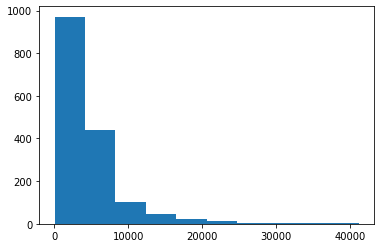

In [341]:
import matplotlib.pyplot as plt 
plt.hist(all_likes);

## Selenium

### Selenium

Веб-страницы бывают динамичные. Например, чтобы получить новую пачку товаров, нужно пролистать страницу вниз, тогда в html попадут новые товары. Или в ссылке страницы нет номера страницы, на которой мы находимся, зато есть кнопка "Следующая страница". 

Все это делает парсинг сложнее и обычного способа, которым мы пользовались раньше, уже недостаточно. Здесь нам может помочь **selenium**. **Selenium** – это инструмент для роботизированного управления браузером. 

Для его коректной работы нужно: 
1. скачать драйвер: [для chrome](https://sites.google.com/chromium.org/driver/) или [для firefox](https://github.com/mozilla/geckodriver/releases)
2. установить пакет `pip install selenium`

**Важно:** драйверы делаются для определенной версии браузера, поэтом проверьте главную версию своего бразуера (*Help -> About Google Chrome*) и скачайте драйвер для него.

<img src="images/chrome_version.png" width="400px">

### Инициализация сессии

При создании сессии, нужно, чтобы *selenium* нашел драйвер, который мы скачали. Путь до драйвера можно указать явно или закинуть драйвер в системную папку с бинарниками. На маке: */usr/bin*.

Если все получилось, то у вас откроется пустое окно браузера.

In [364]:
from selenium import webdriver

driver = webdriver.Chrome(
    '/Users/akhmed.zarmanbetov/Downloads/chromedriver',
)
# driver = webdriver.Firefox()
print(type(driver))

/var/folders/8m/23gw8hwj6yz374j_gh302xhc0000gp/T/ipykernel_3240/3623109910.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(


<class 'selenium.webdriver.chrome.webdriver.WebDriver'>


In [17]:
# если драйвер лежит с бинарниками
from selenium import webdriver

driver = webdriver.Chrome()
# driver = webdriver.Firefox()
print(type(driver))

### Переход на страницу

После того как браузер запущен вы будете использовать разные методы у объекта `driver`. Первый метод, который вам нужен `.get`, который принимает *url* и переходит на страницу.

In [365]:
# ref = 'https://www.wildberries.ru/'
ref = 'https://www.ozon.ru/'
driver.get(ref)

<img src="images/wb_main.png">

### Поисковая строка

Допустим, мы хотим найти товары по запросу. Для этого нам нужно вбить их в поисковую строку. Сначала найдем элемент, а дальше можем на него кликнуть.

In [358]:
from selenium.webdriver.common.by import By

search = driver.find_element(
    by=By.ID,
    value='searchInput',
)

search.click()

<img src="images/wb_search.png">

### Запрос

Теперь в эту поисковую строку нужно что-то записать и нажать *Enter*.

In [353]:
from selenium.webdriver.common.keys import Keys

search.send_keys('футболка мужская')
search.send_keys(Keys.ENTER)

# search.clear()  # очищает строку

<img src="images/wb_find.png">

### Дальше уже умеем

Дальше мы можем получить *html* и искать в нем. Надо только закрыть браузер.

In [354]:
from bs4 import BeautifulSoup

bs = BeautifulSoup(driver.page_source)

driver.close()

### Полезные ссылки

Вообще *selenium* придумывали для тестировщиков, а не для парсинга. Для парсеров имеет смысл использовать только в крайнем случае. Он очень медленный.

[Документация](https://selenium-python.readthedocs.io) selenium.

[Решение](https://stackoverflow.com/questions/15058462/how-to-save-and-load-cookies-using-python-selenium-webdriver/15058521#15058521) как сохранять куки.

[Решение](https://stackoverflow.com/questions/29916054/change-user-agent-for-selenium-web-driver) как поменять *User-Agent*. По дефолту у *selenium* он нормальный. Можно посмотреть с помощью команды:
```
agent = driver.execute_script("return navigator.userAgent")
```

[Waiting](https://selenium-python.readthedocs.io/waits.html) – умное ожидание загрузки страницы.

[Scrolling](https://stackoverflow.com/questions/20986631/how-can-i-scroll-a-web-page-using-selenium-webdriver-in-python) – как листать страницу вверх-вниз.

```python
driver.forward()
driver.back()
```

## Хитрости

### Хитрость №1:  не стесняйтесь пользоваться `try-except`

__Как это использовать при парсинге?__  
Предположим, что мы на ночь поставили парсер скачивать цены, он отработал час и упал из-за того, что на какой-нибудь одной странице были криво проставлены теги, либо вылезло какое-то редкое поле, либо вылезли какие-то артефакты от старой версии сайта, которые не были учтены в нашем парсере. Гораздо лучше, чтобы код проигнорировал эту ошибку и продолжил работать дальше. Можно даже складывать плохие ссылки, чтобы отсмотреть их потом и перезапустить позже.

In [ ]:
bad_urls = []
data = {}
for url in urls:
    try:
        data[url] = parse_data(url)
    except:
        print(f'Плохая ссылка: {url}')
        bad_urls.append(url)

### Хитрость №2: pd.read_html

Если на странице, которую вы спарсили, среди тэгов `<tr>` и `<td>` прячется таблица, чаще всего можно забрать её себе без написания цикла, который будет перебирать все стобцы и строки. Поможет в этом `pd.read_html`. Например, вот так можно забрать себе [табличку с сайта ЦБ](https://cbr.ru/currency_base/daily/) 

In [361]:
import pandas as pd

df = pd.read_html('https://cbr.ru/currency_base/daily/')[0]
df.head()

,Цифр. код,Букв. код,Единиц,Валюта,Курс
0,36,AUD,1,Австралийский доллар,367233
1,944,AZN,1,Азербайджанский манат,316280
2,51,AMD,100,Армянских драмов,131799
3,933,BYN,1,Белорусский рубль,209514
4,975,BGN,1,Болгарский лев,285542


### Хитрость №3:  используйте пакет tqdm

> Код уже работает час. Я вообще без понятия когда он закончит работу. Было бы круто узнать, сколько ещё ждать... 

Если в вашей голове возникла такая мысль, пакет `tqdm` ваш лучший друг. Установите его: ```pip install tqdm```.

In [185]:
import time
from tqdm import tqdm_notebook

a = list(range(30))

for i in tqdm_notebook(a):
    time.sleep(1)

/var/folders/8m/23gw8hwj6yz374j_gh302xhc0000gp/T/ipykernel_3240/1482089762.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(a):


  0%|          | 0/30 [00:00<?, ?it/s]

### Хитрость №4:  распаралеливание

Если сервер не очень настроен вас банить, можно распаралелить свои запросы к нему. Самый простой способ сделать это — библиотека `joblib`. Или библиотека `multiprocessing`. 

In [189]:
# !pip install joblib
from joblib import Parallel, delayed
from tqdm import tqdm_notebook

def simple_function(x):
    return x**2


nj = -1 # паралель на все ядра 
result = Parallel(n_jobs=nj)(
                delayed(simple_function)(item)          # какую функцию применяем 
                for item in tqdm_notebook(range(10)))   # к каким объектам применям

/var/folders/8m/23gw8hwj6yz374j_gh302xhc0000gp/T/ipykernel_3240/2388287161.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for item in tqdm_notebook(range(10)))   # к каким объектам применям


  0%|          | 0/10 [00:00<?, ?it/s]

### Хитрость №5:  selenium без браузера

*Selenium* можно настроить так, чтобы физически браузер не открывался. Удобно, когда вы уже все настроили.

In [192]:
from selenium import webdriver
from selenium.webdriver.firefox.options import Options

options = Options()
options.headless = True 
driver = webdriver.Firefox(options=options)

ref = 'http://google.com'
driver.get(ref)

driver.close()

### Ещё хитрости

* __Сохраняйте то, что парсите по мере скачки!__ Прямо внутрь цикла напишите код, который сохраняет данные в файл. Лучше сохранять батчами.
* Когда код упал в середине списка для скачки, не обязательно запускать его с самого начала. Просто сохраните тот кусок, который уже скачался и дозапустите код с места падения.
* Можно ориентироваться на html-страничке с помощью `xpath`. Он предназначен для того, чтобы внутри html-странички можно было быстро находить какие-то элементы. [Подробнее можно почитать тут](https://devhints.io/xpath).
* Не ленитесь листать документацию. Из неё можно узнать много полезных штук. 